# Conceptualization and Verification of Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stress is represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [4]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I, K_II

In [5]:
params = {beta:45*np.pi/180}

In [6]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

In [7]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [8]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

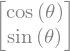

In [9]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress Equation
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}}
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

## Angular Function

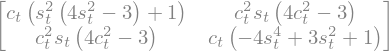

In [10]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

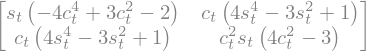

In [11]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

## Stress Equation at the Crack tip in Cartesian Coordinates

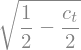

In [12]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

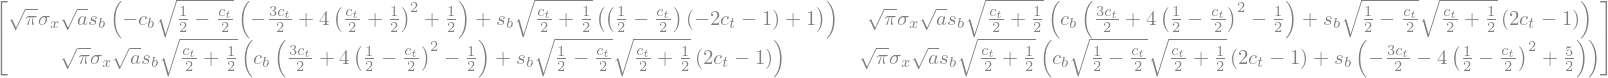

In [13]:
sigma = sp.Matrix([[K_I_ * S_I_[0,0] + K_II_ * S_II_[0,0], K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1]],
                   [K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1], K_I_ * S_I_[1,1] + K_II_ * S_II_[1,1]]])
sigma_ = sp.simplify(sigma)
sigmaa = sigma_.subs(c_t, c_t_h).subs(s_t, s_t_h)
sigmaa

## Stress Transformation from Cartesian to Polar Coordinates
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
T_t = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma_t = T_t^T \sigma_{ij} T_t 
\end{align}

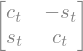

In [14]:
T_t = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
T_t

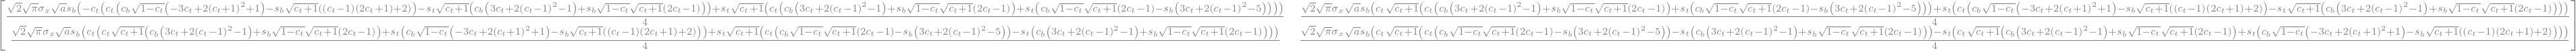

In [15]:
sig_p = T_t.T * sigmaa * T_t
sig_sim = sp.simplify(sig_p)
sig_sim

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

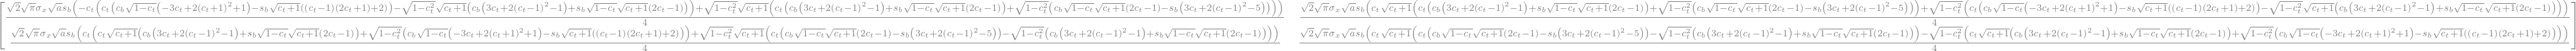

In [16]:
s_t_ = sp.sqrt(1 - c_t**2)
sig = sig_sim.subs(s_t, s_t_)
sig

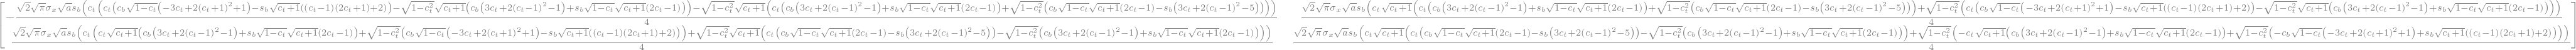

In [17]:
sig_ = sp.simplify(sig)
sig_

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta \theta}$ is maximum depicting principal stress than $\sigma_{r \theta}$ becomes:  
\begin{gather*}
\sigma_{r \theta} = 0
\end{gather*}

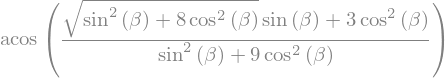

In [18]:
theta_sol = sp.solve(sig_[1,0], c_t)
theta_val = theta_sol[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_ = sp.acos(theta_val)
theta_

In [19]:
get_theta = sp.lambdify((beta), theta_, 'numpy')
get_theta

<function _lambdifygenerated(Dummy_172)>

<IPython.core.display.Javascript object>


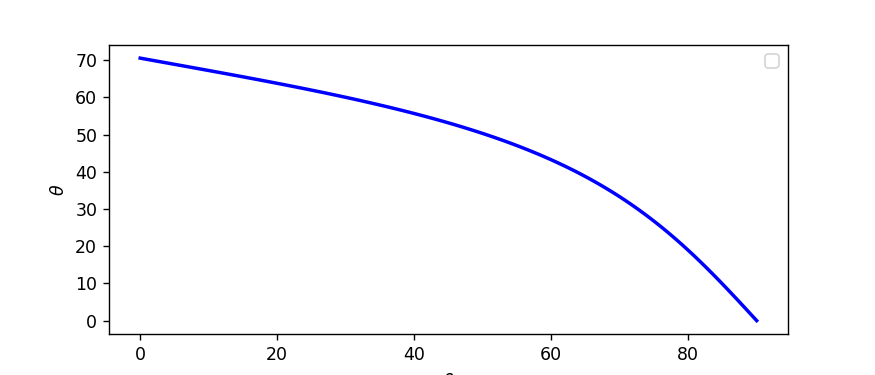

No handles with labels found to put in legend.


In [24]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta = np.linspace(0, 90 * np.pi/180, 100)
theta = get_theta(beta) 
ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()

In [21]:
theta * 180/ np.pi 

array([70.52877937, 70.22600982, 69.9236718 , 69.62163091, 69.31975326,
       69.01790532, 68.71595362, 68.4137646 , 68.11120437, 67.80813847,
       67.50443166, 67.1999477 , 66.89454913, 66.58809701, 66.28045073,
       65.97146774, 65.6610033 , 65.34891025, 65.03503873, 64.71923593,
       64.4013458 , 64.08120876, 63.75866143, 63.43353627, 63.10566131,
       62.77485977, 62.44094973, 62.10374375, 61.7630485 , 61.41866433,
       61.07038485, 60.71799648, 60.361278  , 60.        , 59.63392441,
       59.2628039 , 58.88638133, 58.5043891 , 58.11654851, 57.7225691 ,
       57.32214785, 56.91496848, 56.5007006 , 56.07899884, 55.64950198,
       55.21183197, 54.7655929 , 54.31036997, 53.84572838, 53.3712121 ,
       52.8863427 , 52.39061802, 51.88351085, 51.36446753, 50.83290649,
       50.28821676, 49.72975645, 49.15685117, 48.5687925 , 47.96483636,
       47.34420146, 46.70606786, 46.04957548, 45.37382282, 44.67786585,
       43.96071711, 43.22134512, 42.45867421, 41.67158482, 40.85

In [22]:
beta * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

## Verification with Eigen Value Analysis
In order to verify the above results, some eigen value analysis will be carried out as shown below to compare the plausibility of the above results.

In [23]:
P_rt, D_rt = sig_.diagonalize()

KeyboardInterrupt: 

In [ ]:
P_rt, D_rt

In [ ]:
sp.simplify(P_rt* D_rt * P_rt**(-1))

In [ ]:
theta_f = sp.atan( sp.simplify(-P_rt[0,0] / P_rt[1,0]))
theta_f